In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon_Sale_Report.csv",low_memory=False)

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Cleane Data

In [6]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

C:\Users\j s\AppData\Local\Temp\ipykernel_8764\2554602042.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [7]:
# Clean data: Remove rows with null Amount and 'Cancelled' status
df_cleaned = df.dropna(subset=['Amount'])
df_cleaned = df_cleaned[df_cleaned['Status'].str.lower() != 'cancelled']

In [8]:

df_cleaned = df_cleaned[[
    'Date', 'Status', 'Fulfilment', 'Qty', 'SKU',
    'Category', 'Amount','ship-country', 'ship-state', 'B2B'
]]

In [9]:
df_cleaned.isnull().sum()


Date             0
Status           0
Fulfilment       0
Qty              0
SKU              0
Category         0
Amount           0
ship-country    26
ship-state      26
B2B              0
dtype: int64

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110414 entries, 1 to 128974
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          110414 non-null  datetime64[ns]
 1   Status        110414 non-null  object        
 2   Fulfilment    110414 non-null  object        
 3   Qty           110414 non-null  int64         
 4   SKU           110414 non-null  object        
 5   Category      110414 non-null  object        
 6   Amount        110414 non-null  float64       
 7   ship-country  110388 non-null  object        
 8   ship-state    110388 non-null  object        
 9   B2B           110414 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 8.5+ MB


In [11]:
df_cleaned.head()

,Date,Status,Fulfilment,Qty,SKU,Category,Amount,ship-country,ship-state,B2B
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,1,JNE3781-KR-XXXL,kurta,406.0,IN,KARNATAKA,False
2,2022-04-30,Shipped,Amazon,1,JNE3371-KR-XL,kurta,329.0,IN,MAHARASHTRA,True
4,2022-04-30,Shipped,Amazon,1,JNE3671-TU-XXXL,Top,574.0,IN,TAMIL NADU,False
5,2022-04-30,Shipped,Amazon,1,SET264-KR-NP-XL,Set,824.0,IN,UTTAR PRADESH,False
6,2022-04-30,Shipped,Amazon,1,J0095-SET-L,Set,653.0,IN,CHANDIGARH,False


Totel Revenue

In [12]:
tr = df_cleaned["Amount"].sum()
print("Total Revenue Generated : ", round(tr,2))

Total Revenue Generated :  71673394.0


In [13]:
top_categories = df_cleaned.groupby("Category").agg(total_sales=('Amount', 'sum'))
top_categories = top_categories.sort_values(by='total_sales', ascending=False)

print("Revenue by Category ")
print(top_categories)


Revenue by Category 
               total_sales
Category                  
Set             35731673.0
kurta           19425870.0
Western Dress   10209590.0
Top              4904066.0
Ethnic Dress      732744.0
Blouse            418389.0
Bottom            135453.0
Saree             114694.0
Dupatta              915.0


Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Name: Amount, dtype: float64


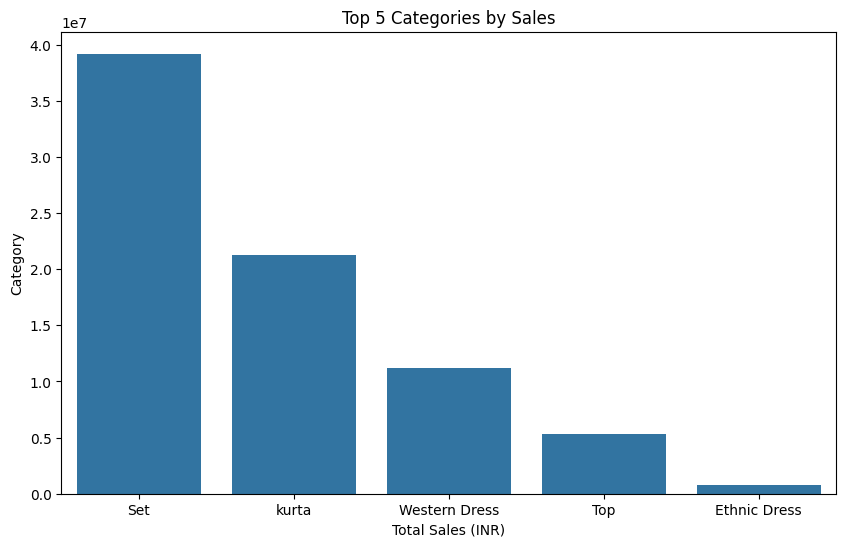

In [14]:
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head()
print(top_categories.head(10))
plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.values,x=top_categories.index)
plt.title("Top 5 Categories by Sales")
plt.xlabel("Total Sales (INR)")
plt.ylabel("Category")

plt.show()

Top Sealing Product:
Category
Set              42843
kurta            42522
Western Dress    13369
Top               9336
Ethnic Dress      1013
Name: SKU, dtype: int64


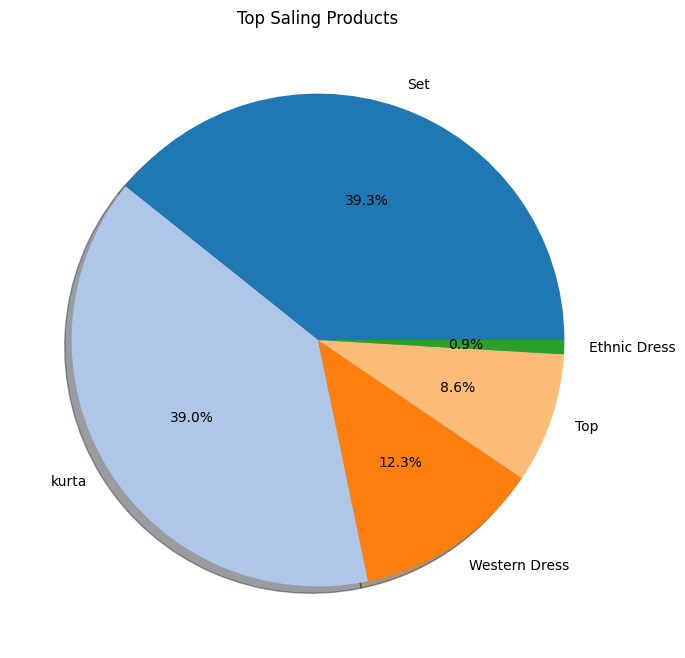

In [15]:
topsalingproduct = df_cleaned.groupby("Category")["SKU"].count().sort_values(ascending = False).head()
print("Top Sealing Product:")
print(topsalingproduct)

plt.figure(figsize=(8,8))
plt.title("Top Saling Products")
plt.pie(topsalingproduct,
        labels=topsalingproduct.index,
        shadow=True,
        autopct='%1.1f%%',
        colors=plt.cm.tab20.colors
)

plt.show()

Revenue By Region

ship-state
MAHARASHTRA       12224770.0
KARNATAKA          9649981.0
TELANGANA          6290128.0
UTTAR PRADESH      6186656.0
TAMIL NADU         5954349.0
DELHI              3906089.0
KERALA             3377321.0
WEST BENGAL        3207213.0
ANDHRA PRADESH     2882206.0
HARYANA            2654274.0
Name: Amount, dtype: float64


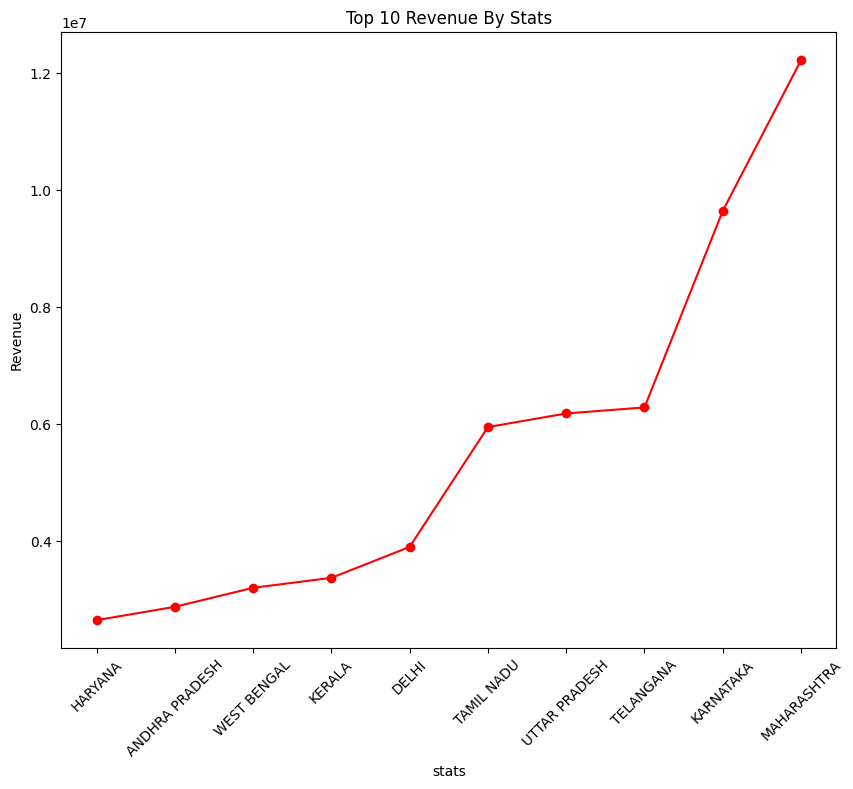

In [16]:
rbr = df_cleaned.groupby("ship-state")["Amount"].sum().sort_values(ascending = False).head(10)
print(rbr)
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel("stats")
plt.title("Top 10 Revenue By Stats")
plt.ylabel("Revenue")
plt.plot(rbr.sort_values(),marker="o",color="red")
# plt.show()

In [17]:
orderstate = df_cleaned.groupby("Status")["SKU"].count().sort_values(ascending = False)
print(orderstate)

Status
Shipped                          77596
Shipped - Delivered to Buyer     28761
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: SKU, dtype: int64


In [18]:
A_M = df_cleaned.groupby("Fulfilment")["Qty"].sum().sort_values(ascending = False)
print(A_M)

Fulfilment
Amazon      78264
Merchant    32562
Name: Qty, dtype: int64


In [19]:
top_qty = df_cleaned.groupby('SKU')['Qty'].sum().sort_values(ascending=False)
print("\nTop 5 Products by Quantity Sold:\n", top_qty.head(5))


Top 5 Products by Quantity Sold:
 SKU
JNE3797-KR-L    647
JNE3797-KR-M    555
JNE3797-KR-S    489
JNE3405-KR-L    447
J0230-SKD-M     435
Name: Qty, dtype: int64



Monthly Sales Trend:
 Date
2022-03       94810.0
2022-04    26234520.0
2022-05    23953534.0
2022-06    21390530.0
Freq: M, Name: Amount, dtype: float64


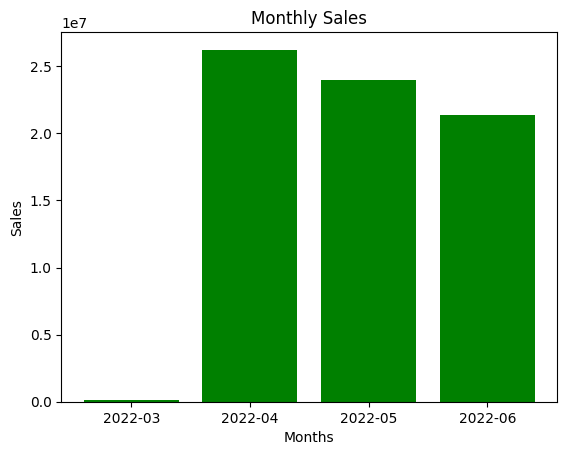

In [34]:
monthly_sales = df_cleaned.groupby(df_cleaned['Date'].dt.to_period('M'))['Amount'].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)

plt.bar(monthly_sales.index.astype(str),monthly_sales.values,color="green")
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

Top saling month is April 2022

In [21]:
order_status = df_cleaned['Status'].value_counts(normalize=True) * 100
print("Order Status Breakdown (%):\n", order_status.round(2))

Order Status Breakdown (%):
 Status
Shipped                          70.28
Shipped - Delivered to Buyer     26.05
Shipped - Returned to Seller      1.77
Shipped - Picked Up               0.88
Pending                           0.59
Pending - Waiting for Pick Up     0.25
Shipped - Returning to Seller     0.13
Shipped - Out for Delivery        0.03
Shipped - Rejected by Buyer       0.01
Shipped - Lost in Transit         0.00
Shipped - Damaged                 0.00
Name: proportion, dtype: float64


In [22]:
delivery_by_fulfilment = df_cleaned.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)
print("\nDelivery Status by Fulfilment:\n", delivery_by_fulfilment)


Delivery Status by Fulfilment:
 Status      Pending  Pending - Waiting for Pick Up  Shipped  \
Fulfilment                                                    
Amazon          413                              0    77596   
Merchant        243                            281        0   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon                      0                             0   
Merchant                    1                         28761   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                              0                           0   
Merchant                            5                          35   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                                     
Amazon                        0                         

In [23]:
b2b_stats = df_cleaned.groupby('B2B')['Amount'].agg(['count', 'sum', 'mean'])
print("\nB2B vs Consumer Stats:\n", b2b_stats)


B2B vs Consumer Stats:
         count         sum        mean
B2B                                  
False  109617  71113994.0  648.749683
True      797    559400.0  701.882058


Total Revenue: ₹71,673,394

Top Categories by Revenue:

Set – ₹35.7M

Kurta – ₹19.4M

Western Dress – ₹10.2M

Top Selling States: Maharashtra, Karnataka, Telangana

Top Products (by Quantity): JNE3797-KR-L, JNE3797-KR-M, etc.

Peak Sales Month: April 2022

B2B Sales: Contributed ₹559K from 797 orders (avg ₹701/order)